In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

In [83]:
# Dataset details at- 
X_initial, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
combine_dataset = pd.concat([X_initial, y], axis=1)

/Users/levbarbash/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [84]:
# features from the dataset
features = ['age', 'fare','embarked','sex','pclass']
X = X_initial[features].copy()

In [85]:
numerical_features = ['age', 'fare']

# Applying SimpleImputer and StandardScaler into a pipelin
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

In [86]:
categorical_features = ['embarked', 'sex', 'pclass']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [87]:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.5,random_state=1)

In [90]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

In [91]:
kernel = 1.0 * RBF(1.0)
model_dict = {'Gradient Boosting' : GradientBoostingClassifier(random_state=2),
              'MLPClassifier' : MLPClassifier(random_state=1, max_iter=10000),
              'Gaussian Process' : GaussianProcessClassifier(kernel=kernel, random_state=0),
              'Logistic Regression' : LogisticRegression(max_iter=10000), 
             'Support Vector' : SVC(gamma='auto', random_state=2),
             'Random Forest' : RandomForestClassifier(max_depth=2, random_state=0)} 

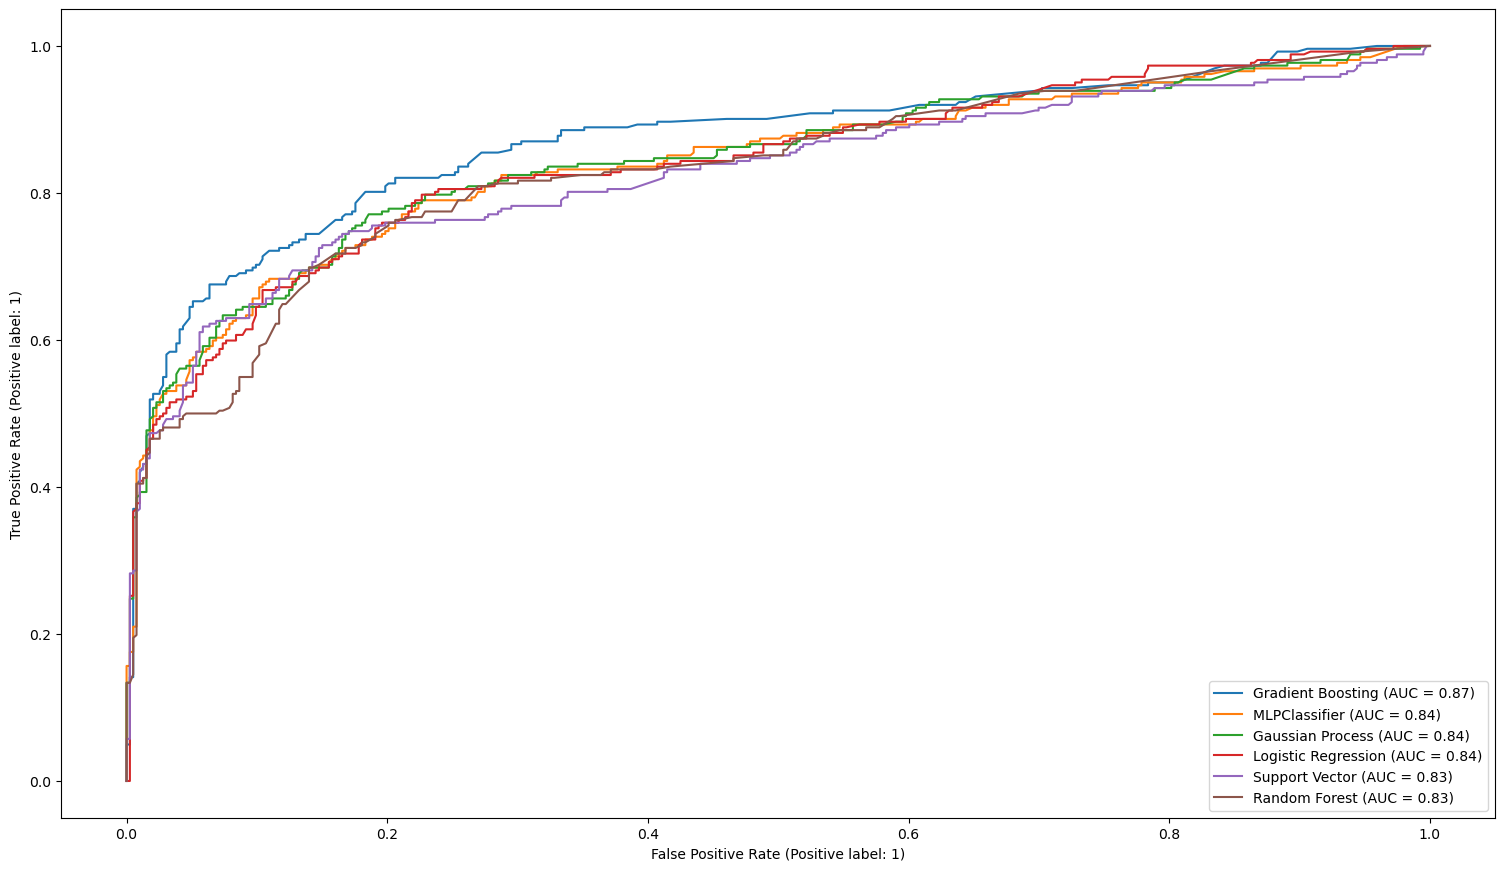

In [92]:
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
for key in model_dict.keys():
    pipe = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe', model_dict[key])])
    grid = GridSearchCV(pipe, param_grid=param_grid)
    grid.fit(X_train, y_train);
    model_dict[key] = grid
    metrics.RocCurveDisplay.from_estimator(grid, X_test, y_test, ax=ax, name=key)
plt.show()